In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

In [2]:
data1 = pd.read_csv("cleaned.csv")

In [3]:
# Using the creditcard.csv for analysis of original dataset

In [4]:
authentic = len(data1[data1['Class'] == 0])
fraudulent = len(data1[data1['Class'] == 1])
print("Authentic transactions:" + str(authentic))
print("Fraudulent transactions:" + str(fraudulent))

Authentic transactions:90276
Fraudulent transactions:108


In [5]:
a1 = data1['Class']
a2 = data1['Amount']
a3 = data1['Time']
fit=stats.linregress(a3,a2)
fit.slope,fit.intercept

(-3.0966482275970015e-05, 80.62527285730377)

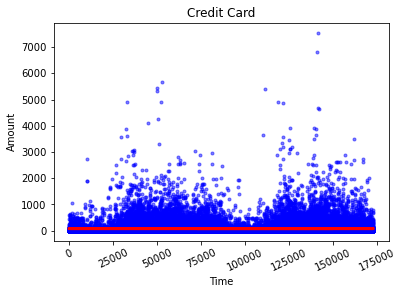

In [6]:
plt.xticks(rotation=25)
plt.xlabel("Time")
plt.ylabel("Amount")
plt.title("Credit Card")
plt.plot(a3, a2, 'b.' ,alpha=0.5)
plt.plot(a3, a2*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.show()

In [7]:
fit.pvalue

0.0232128601586698

Text(0.5, 1.0, 'Plot of residuals')

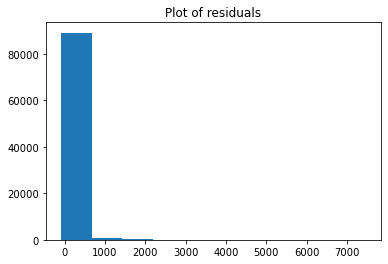

In [8]:
residuals = a2 - (fit.slope*a3 + fit.intercept)
plt.hist(residuals)
plt.title("Plot of residuals")

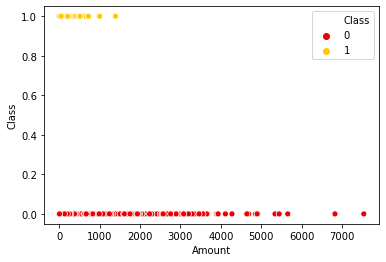

In [9]:
sns.scatterplot(data=data1, x='Amount', y='Class',hue='Class',palette='hot')

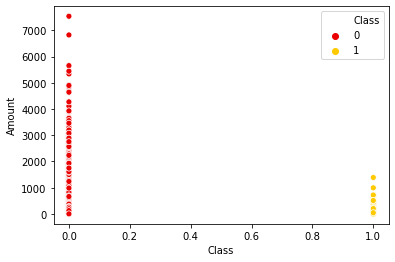

In [10]:
sns.scatterplot(data=data1, x='Class', y='Amount',hue='Class',palette='hot')

In [11]:
corrMatrix = data1.corr()
print (corrMatrix)

            Unnamed: 0      Time        V1        V2        V3        V4  \
Unnamed: 0    1.000000 -0.003310 -0.001322 -0.000193 -0.002703  0.006947   
Time         -0.003310  1.000000  0.121607 -0.009831 -0.452324 -0.107115   
V1           -0.001322  0.121607  1.000000 -0.047574 -0.118086  0.045599   
V2           -0.000193 -0.009831 -0.047574  1.000000  0.025855  0.036673   
V3           -0.002703 -0.452324 -0.118086  0.025855  1.000000  0.041307   
V4            0.006947 -0.107115  0.045599  0.036673  0.041307  1.000000   
V5           -0.002961  0.187782 -0.064849  0.043960 -0.113267  0.011907   
V6            0.001301 -0.069725 -0.006900 -0.003068  0.012671  0.002884   
V7            0.000628  0.098877 -0.069206  0.130291 -0.051188  0.024845   
V8           -0.002473 -0.046078 -0.037078  0.002919 -0.005293  0.001749   
V9            0.001950 -0.009099  0.018839 -0.004772 -0.016126  0.024113   
V10           0.004772  0.020753  0.005219 -0.027841 -0.046594  0.048595   
V11         

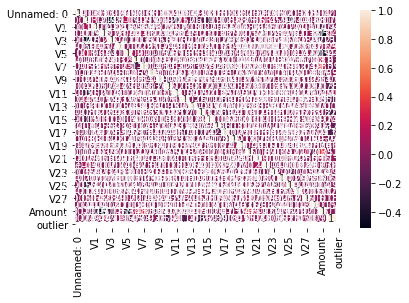

In [12]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

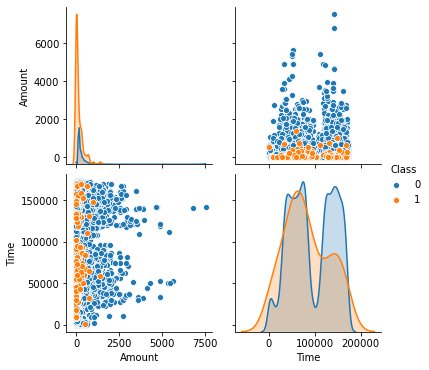

In [13]:
data=data1[['Class','Amount','Time']]
sns.pairplot(data,hue="Class")

In [14]:
# Using cleaned.csv for analysis of cleaned dataset (without outliers)
df = pd.read_csv("cleaned.csv")

In [15]:
authentic1 = len(df[df['Class'] == 0])
fraudulent1 = len(df[df['Class'] == 1])
print("Authentic transactions:" + str(authentic1))
print("Fraudulent transactions:" + str(fraudulent1))

Authentic transactions:90276
Fraudulent transactions:108


In [16]:
a4 = df['Class']
a5 = df['Amount']
a6 = df['Time']
fit=stats.linregress(a6,a5)
fit.slope,fit.intercept

(-3.0966482275970015e-05, 80.62527285730377)

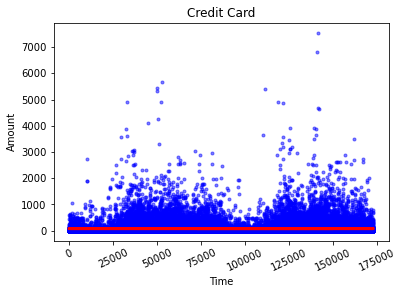

In [17]:
plt.xticks(rotation=25)
plt.xlabel("Time")
plt.ylabel("Amount")
plt.title("Credit Card")
plt.plot(a6, a5, 'b.' ,alpha=0.5)
plt.plot(a6, a5*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.show()

Text(0.5, 1.0, 'Plot of residuals')

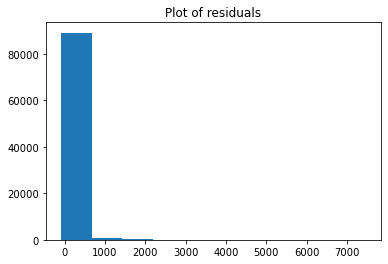

In [18]:
residuals = a5 - (fit.slope*a6 + fit.intercept)
plt.hist(residuals)
plt.title("Plot of residuals")

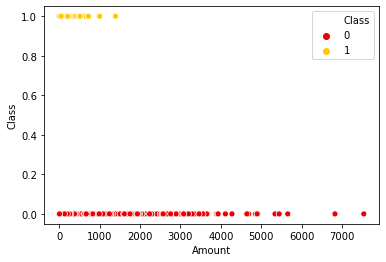

In [19]:
sns.scatterplot(data=df, x='Amount', y='Class',hue='Class',palette='hot')

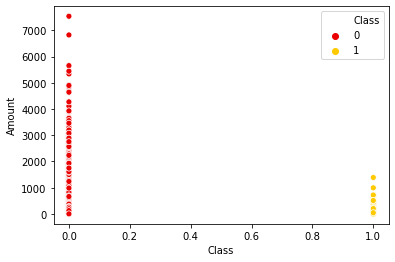

In [20]:
sns.scatterplot(data=df, x='Class', y='Amount',hue='Class',palette='hot')

In [21]:
# Performing statistical tests on the cleaned dataset i.e cleaned_edited.csv

In [22]:
x1=df['Class']
x2=df['Amount']
z1=df['V1']
z2=df['V2']
z3=df['V3']
z4=df['V4']
z5=df['V5']
z6=df['V6']
z7=df['V7']
z8=df['V8']
z9=df['V9']
z10=df['V10']
z11=df['V11']
z12=df['V12']
z13=df['V13']
z14=df['V14']
z15=df['V15']
z16=df['V16']
z17=df['V17']
z18=df['V18']
z19=df['V19']
z20=df['V20']
z21=df['V21']
z22=df['V22']
z23=df['V23']
z24=df['V24']
z25=df['V25']
z26=df['V26']
z27=df['V27']
z28=df['V28']

In [23]:
# T-test
# First Checking for normality
print(stats.normaltest(x1).pvalue)
print(stats.normaltest(z26).pvalue)

0.0
0.0


In [24]:
# Checking Equal variance
print(stats.levene(x1, z1).pvalue)
print(stats.levene(z25, z26).pvalue)

0.0
2.722333329633981e-78


In [25]:
print(stats.ttest_ind(x1, z1, equal_var=False).pvalue)
print(stats.ttest_ind(x1, z2, equal_var=False).pvalue)
print(stats.ttest_ind(z25, z26, equal_var=False).pvalue)

7.694976245259622e-25
6.314549305352864e-09
0.20269094619823344


In [26]:
# Anova test
anova = stats.f_oneway(x1,z1, z2, z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28)
print(anova)
print(anova.pvalue)

F_onewayResult(statistic=26.970878696844924, pvalue=5.727479019651288e-141)
5.727479019651288e-141


In [27]:
# Post hoc analysis
x_data = pd.DataFrame({'X1':x1, 'V1':z1 , 'V2': z2, 'V3':z3, 'V4': z4, 'V5':z5, 'V6': z6, 'V7':z7, 'V8':z8, 'V9':z9, 'V10':z10,'V11':z11,'V12':z12, 'V13':z13, 'V14':z14, 'V15':z15, 'V16':z16, 'V17':z17, 'V18':z18,'V19':z19, 'V20':z20,'V21':z21, 'V22':z22, 'V23':z23, 'V24':z24, 'V25':z25, 'V26':z26,'V27':z27,'V28':z28})
x_melt = pd.melt(x_data)
posthoc = pairwise_tukeyhsd(
    x_melt['value'], x_melt['variable'],
    alpha=0.05)

In [28]:
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    V1    V10  -0.0663  0.001 -0.0832 -0.0495   True
    V1    V11  -0.0713  0.001 -0.0881 -0.0545   True
    V1    V12  -0.0469  0.001 -0.0637 -0.0301   True
    V1    V13  -0.0713  0.001 -0.0881 -0.0545   True
    V1    V14  -0.0655  0.001 -0.0824 -0.0487   True
    V1    V15  -0.0576  0.001 -0.0744 -0.0408   True
    V1    V16  -0.0552  0.001 -0.0721 -0.0384   True
    V1    V17   -0.067  0.001 -0.0838 -0.0502   True
    V1    V18  -0.0671  0.001 -0.0839 -0.0503   True
    V1    V19  -0.0585  0.001 -0.0753 -0.0417   True
    V1     V2  -0.0338  0.001 -0.0506  -0.017   True
    V1    V20  -0.0766  0.001 -0.0934 -0.0598   True
    V1    V21   -0.068  0.001 -0.0848 -0.0512   True
    V1    V22  -0.0617  0.001 -0.0785 -0.0449   True
    V1    V23  -0.0631  0.001 -0.0799 -0.0463   True
    V1    V24  -0.0632  0.001   -0.08 -0.0464 

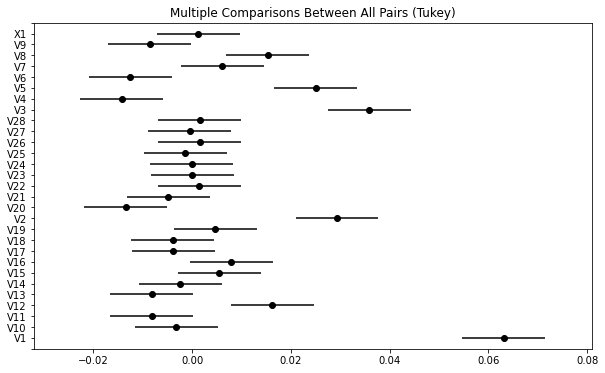

In [29]:
fig = posthoc.plot_simultaneous()

In [30]:
# Chi-square
contingency = [[authentic1],[fraudulent1]]
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(p)

1.0


In [31]:
# OLS analysis
xa = df['Class']
xb = df['Amount'] 
xc = sm.add_constant(xa)
data_1 = sm.OLS(xb, xc)
data_2 = data_1.fit()
print(data_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     13.27
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           0.000270
Time:                        02:20:51   Log-Likelihood:            -6.0448e+05
No. Observations:               90384   AIC:                         1.209e+06
Df Residuals:                   90382   BIC:                         1.209e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.6013      0.646    120.044      0.0